In [693]:
import pandas as pd 
import numpy as np

In [694]:
# Reading scraped files

In [695]:
import os
import glob

In [696]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [697]:
len(csv_files)

71

In [698]:
data=pd.read_csv(csv_files[0])

In [699]:
for i in csv_files[1:]:
    readed_data=pd.read_csv(i)
    data=pd.concat([data,readed_data],ignore_index=True)

In [700]:
data.head()

,MP,games_starts,minutes,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,...,fouls,fouled,offsides,crosses,interceptions,tackles_won,pens_won,pens_conceded,main_info,country
0,1.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Masood Abdulsaeed Position: DF 180cm, 69kg (5-...",Afghanistan
1,1.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mustafa Afshar Position: FW Born: November 25,...",Afghanistan
2,4.0,4.0,321,0.0,NaN,0.0,0.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bashir Ahmad Saadat Position: DF Born: Decembe...,Afghanistan
3,2.0,2.0,104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moshtaq Ahmadi Moshtaq Ahmadi Position: FW 180...,Afghanistan
4,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Qesmat Ahmadi Position: MF Born: August 13, 19...",Afghanistan


In [701]:
data.describe()

,MP,games_starts,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,pens_won,pens_conceded
count,44887.000000,44887.000000,44739.000000,40455.000000,44733.000000,44734.000000,43436.000000,44739.000000,44739.000000,33544.000000,25490.000000,18438.000000,18441.00000,18428.000000,18425.000000,18425.000000,12290.000000,12290.000000
mean,76.311761,61.124758,7.769530,4.801631,7.113496,0.651250,0.817870,10.813384,0.698227,0.168883,69.334092,32.894023,4.82604,43.971945,30.805645,28.126784,0.188446,0.221969
std,102.017541,88.459597,18.449261,10.123852,16.522869,2.622051,3.146857,17.296886,1.531443,0.511277,104.168824,53.586972,12.57997,96.622404,52.034252,44.271637,0.758469,0.681675
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,25.000000,9.000000,0.00000,5.000000,6.000000,7.000000,0.000000,0.000000
75%,112.000000,87.000000,7.000000,5.000000,6.000000,0.000000,0.000000,14.000000,1.000000,0.000000,93.000000,44.000000,4.00000,39.000000,38.000000,39.000000,0.000000,0.000000
max,773.000000,768.000000,482.000000,206.000000,421.000000,61.000000,75.000000,201.000000,22.000000,7.000000,1290.000000,714.000000,192.00000,1528.000000,498.000000,449.000000,19.000000,10.000000


In [702]:
import seaborn as sns 

<AxesSubplot:>

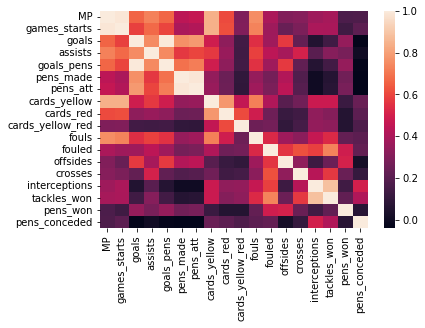

In [703]:
sns.heatmap(data.corr())

In [704]:
# Data preparation/ cleaning  

In [705]:
# Extract Name 

In [706]:
data['main_info'][0]

'Masood Abdulsaeed Position: DF 180cm, 69kg (5-10½, 152lb) Born: March 1, 1994 in Afghanistan af National Team: Afghanistan af'

In [707]:
data['name']=data['main_info'].apply(lambda x: x.split(' ')[0]+' '+ x.split(' ')[1])

In [708]:
data['name']

0        Masood Abdulsaeed
1           Mustafa Afshar
2             Bashir Ahmad
3           Moshtaq Ahmadi
4            Qesmat Ahmadi
               ...        
45762       Roberto Acosta
45763       Federico Acuña
45764         Javier Acuña
45765        Roberto Acuña
45766         Ronald Acuña
Name: name, Length: 45767, dtype: object

In [709]:
# Extract Position(Target)

In [710]:
pos=data['main_info'].apply(lambda x: x.split('Position'))

In [711]:
condition=data['main_info'].str.contains('Position')

In [712]:
data=data[condition]

In [713]:
data['position']=data['main_info'].apply(lambda x : x.split('Position:')[1].strip().split(' ')[0])

In [714]:
# Extract birth month and year  

In [715]:
def birth_month(x):
    if 'Born:' in x:
        return x.split('Born: ')[1].split(' ')[0]
    else:
        return np.nan

In [716]:
data['month']=data['main_info'].apply(birth_month)

In [717]:
def birth_year(x):
    if 'Born:' in x:
        return x.split('Born: ')[1].split(' ')[2]
    else:
        return np.nan

In [718]:
data['year']=data['main_info'].apply(birth_year)

In [719]:
data=data[~data['year'].isna()]

In [720]:
data.head()

,MP,games_starts,minutes,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,...,interceptions,tackles_won,pens_won,pens_conceded,main_info,country,name,position,month,year
0,1.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,"Masood Abdulsaeed Position: DF 180cm, 69kg (5-...",Afghanistan,Masood Abdulsaeed,DF,March,1994
1,1.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,"Mustafa Afshar Position: FW Born: November 25,...",Afghanistan,Mustafa Afshar,FW,November,1988
2,4.0,4.0,321,0.0,NaN,0.0,0.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,Bashir Ahmad Saadat Position: DF Born: Decembe...,Afghanistan,Bashir Ahmad,DF,December,1981
3,2.0,2.0,104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,Moshtaq Ahmadi Moshtaq Ahmadi Position: FW 180...,Afghanistan,Moshtaq Ahmadi,FW,April,1996
4,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,"Qesmat Ahmadi Position: MF Born: August 13, 19...",Afghanistan,Qesmat Ahmadi,MF,August,1996


In [721]:
# Extract height 

In [722]:
height_condition=data['main_info'].str.contains('cm')

In [723]:
data['main_info'].apply(lambda x : x.split('cm')[0].split(' ')[-1])

0        180
1         af
2         af
3        180
4         af
        ... 
45762    180
45763    181
45764    175
45765    175
45766    JLM
Name: main_info, Length: 45398, dtype: object

In [724]:
height_condition.all()

False

In [725]:
def height_col(x):
    if 'cm' in x:
        return x.split('cm')[0].split(' ')[-1]
    else:
        return np.nan

In [726]:
data['height']=data['main_info'].apply(height_col)

In [727]:
data=data[data['height']!='']

In [728]:
# Extract weight 

In [729]:
data['main_info'].apply(lambda x : x.split('kg')[0].split(' ')[-1])

0         69
1         af
2         af
3         77
4         af
        ... 
45762     82
45763     89
45764     69
45765     86
45766    JLM
Name: main_info, Length: 45397, dtype: object

In [730]:
data['main_info'].apply(lambda x : x.split('kg')[0].split(',')[-1])

0                                                       69
1             Afghanistan af National Team: Afghanistan af
2             Afghanistan af National Team: Afghanistan af
3                                                       77
4                       1996 National Team: Afghanistan af
                               ...                        
45762                                                   82
45763                                                   89
45764                                                   69
45765                                                   86
45766     1993 (Age: 29-090d) Citizenship: Paraguay py ...
Name: main_info, Length: 45397, dtype: object

In [731]:
def weight_col(x):
    if 'kg' in x:
        return x.split('kg')[0].split(' ')[-1]
    else:
        return np.nan

In [732]:
data['weight']=data['main_info'].apply(weight_col)

In [733]:
data['weight'].isna().sum()

24179

In [734]:
data['weight'].value_counts()

73     2139
78     2135
69     1773
68     1487
74     1451
       ... 
70        1
40        1
200       1
116       1
126       1
Name: weight, Length: 68, dtype: int64

In [735]:
def weight_col(x):
    try:
        x=float(x)
    except:
        return np.nan
    return x

In [736]:
data['weight']=data['weight'].apply(weight_col)

In [737]:
data=data.groupby('position').filter(lambda x: len(x)>200)

In [738]:
# Explore target variable 

In [739]:
data['position'].value_counts()

MF       14560
DF       12156
FW        9935
GK        3589
FW-MF     2544
DF-MF     2291
Name: position, dtype: int64

In [740]:
# remove uneccessary data 

In [741]:
data=data[data['MP']>0]

In [742]:
data.to_csv('finaldata/EDA_data.csv',index=False)

In [743]:
#handling missing data 

In [744]:
data.loc[data['position']=='FW-MF','position']='MF'
data.loc[data['position']=='DF-MF','position']='MF'

In [745]:
data['position'].value_counts()

MF    18999
DF    11847
FW     9739
GK     3469
Name: position, dtype: int64

In [746]:
data['minutes']=data['minutes'].astype(str)

In [747]:
data.shape

(44054, 27)

In [748]:
data=data.groupby('month').filter(lambda x: len(x)>43)
data=data.groupby('year').filter(lambda x: len(x)>1)

In [749]:
data['minutes']=data['minutes'].apply(lambda x : x.replace(',',''))

In [750]:
data.shape

(44038, 27)

In [751]:
data['year']

0        1994
1        1988
2        1981
3        1996
4        1996
         ... 
45762    1984
45763    1985
45764    1988
45765    1972
45766    1993
Name: year, Length: 44038, dtype: object

In [752]:
data['year'].value_counts().values

array([2010, 2007, 1995, 1973, 1960, 1902, 1844, 1826, 1782, 1731, 1682,
       1660, 1564, 1496, 1433, 1295, 1273, 1205, 1157, 1027,  964,  940,
        859,  822,  749,  646,  561,  523,  473,  436,  424,  418,  343,
        316,  299,  256,  193,  155,  144,  135,  122,  117,  106,  106,
         65,   62,   44,   36,   35,   33,   31,   31,   26,   26,   25,
         23,   23,   22,   21,   21,   21,   21,   20,   20,   20,   19,
         19,   19,   18,   17,   17,   17,   17,   16,   16,   16,   15,
         15,   14,   13,   13,   13,   12,   12,   12,   12,   11,   11,
         10,   10,    9,    9,    9,    9,    8,    8,    8,    7,    7,
          7,    7,    4,    4,    4,    4,    4,    3,    3,    3,    2],
      dtype=int64)

In [753]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [754]:
scaler=StandardScaler()

In [755]:
data['year'].value_counts()

1996    2010
1995    2007
1997    1995
1994    1973
1993    1960
        ... 
1901       4
1919       3
1900       3
2007       3
1899       2
Name: year, Length: 110, dtype: int64

In [756]:
numerical=['MP', 'games_starts', 'goals', 'assists', 'goals_pens',
       'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
       'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'crosses',
       'interceptions', 'tackles_won','height','minutes','weight']

In [757]:
# data[numerical]=scaler.fit_transform(data[numerical])

In [758]:
forward=data[data['position']=='FW']
mid=data[data['position']=='MF']
goalkeeper=data[data['position']=='GK']
defense=data[data['position']=='DF']

In [759]:
forward.shape


(9732, 27)

In [760]:
mid.shape

(18993, 27)

In [761]:
goalkeeper.shape

(3468, 27)

In [762]:
defense.shape

(11845, 27)

In [763]:
data.shape

(44038, 27)

In [764]:
# Imputing missing values 

In [765]:
data.isna().sum()/len(data)*100

MP                   0.000000
games_starts         0.000000
minutes              0.000000
goals                0.004542
assists              9.428221
goals_pens           0.015895
pens_made            0.013625
pens_att             2.861165
cards_yellow         0.004542
cards_red            0.004542
cards_yellow_red    24.846723
fouls               42.758527
fouled              58.547164
offsides            58.540352
crosses             58.569871
interceptions       58.576684
tackles_won         58.576684
pens_won            72.448794
pens_conceded       72.448794
main_info            0.000000
country              0.000000
name                 0.000000
position             0.000000
month                0.000000
year                 0.000000
height              33.745856
weight              52.472864
dtype: float64

In [766]:
from sklearn.neighbors import KNeighborsClassifier

In [767]:
imputer=KNNImputer(n_neighbors=23)


In [768]:
forward[numerical]

,MP,games_starts,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,height,minutes,weight
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
3,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,180,104,77.0
7,16.0,6.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,183,614,79.0
11,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,178,94,78.0
12,8.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,180,524,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45750,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,NaN
45752,227.0,151.0,44.0,19.0,43.0,1.0,1.0,58.0,3.0,0.0,52.0,NaN,NaN,NaN,NaN,NaN,172,13479,78.0
45753,12.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614,NaN
45764,248.0,102.0,35.0,3.0,34.0,1.0,1.0,27.0,2.0,0.0,83.0,43.0,10.0,38.0,6.0,8.0,175,10716,69.0


In [769]:
data['month']

0           March
1        November
2        December
3           April
4          August
           ...   
45762        July
45763       March
45764        June
45765       March
45766         May
Name: month, Length: 44038, dtype: object

In [770]:
forward[numerical]=imputer.fit_transform(forward[numerical])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [771]:
forward[numerical]

,MP,games_starts,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,height,minutes,weight
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391304,0.043478,0.000000,0.043478,0.217391,0.217391,180.739130,7.0,73.739130
3,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.739130,1.260870,0.565217,0.826087,0.434783,0.956522,180.000000,104.0,77.000000
7,16.0,6.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.565217,8.086957,2.608696,8.347826,2.478261,4.086957,183.000000,614.0,79.000000
11,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.521739,1.304348,0.304348,1.652174,0.521739,0.869565,178.000000,94.0,78.000000
12,8.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,8.521739,4.739130,0.956522,5.913043,2.869565,3.434783,180.000000,524.0,73.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45750,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.217391,1.000000,0.130435,1.260870,0.434783,0.652174,178.478261,67.0,72.391304
45752,227.0,151.0,44.0,19.0,43.0,1.0,1.0,58.0,3.0,0.0,52.000000,61.956522,32.869565,18.130435,11.260870,17.695652,172.000000,13479.0,78.000000
45753,12.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.434783,7.652174,2.739130,7.695652,2.173913,4.000000,180.869565,614.0,75.826087
45764,248.0,102.0,35.0,3.0,34.0,1.0,1.0,27.0,2.0,0.0,83.000000,43.000000,10.000000,38.000000,6.000000,8.000000,175.000000,10716.0,69.000000


In [772]:
defense[numerical]=imputer.fit_transform(defense[numerical])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [773]:
goalkeeper[numerical]=imputer.fit_transform(goalkeeper[numerical])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [774]:
forward[numerical]=imputer.fit_transform(forward[numerical])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [775]:
mid[numerical]=imputer.fit_transform(mid[numerical])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [776]:
data.loc[data['position']=='FW']=forward
data.loc[data['position']=='MF']=mid
data.loc[data['position']=='DF']=defense
data.loc[data['position']=='GK']=goalkeeper


In [777]:
# data[numerical]=scaler.inverse_transform(data[numerical])

In [778]:
data.shape

(44038, 27)

In [779]:
data[numerical].head()

,MP,games_starts,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,height,minutes,weight
0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.739130,0.173913,0.000000,0.565217,0.826087,0.652174,180.0,34.0,69.000000
1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.391304,0.043478,0.000000,0.043478,0.217391,0.217391,180.73913,7.0,73.739130
2,4.0,4.0,0.0,0.043478,0.0,0.0,0.0,2.0,1.0,1.0,3.043478,1.695652,0.043478,3.565217,3.782609,2.956522,181.652174,321.0,73.869565
3,2.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.739130,1.260870,0.565217,0.826087,0.434783,0.956522,180.0,104.0,77.000000
4,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.130435,0.086957,0.043478,0.086957,0.043478,0.043478,178.521739,1.0,69.739130


In [780]:
from matplotlib import pyplot as plt

In [781]:
data[['minutes','height','weight']]=data[['minutes','height','weight']].astype(float)

In [782]:
data.isna().sum()

MP                      0
games_starts            0
minutes                 0
goals                   0
assists                 0
goals_pens              0
pens_made               0
pens_att                0
cards_yellow            0
cards_red               0
cards_yellow_red        0
fouls                   0
fouled                  0
offsides                0
crosses                 0
interceptions           0
tackles_won             0
pens_won            31905
pens_conceded       31905
main_info               0
country                 0
name                    0
position                0
month                   0
year                    0
height                  0
weight                  0
dtype: int64

In [783]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44038 entries, 0 to 45766
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MP                44038 non-null  float64
 1   games_starts      44038 non-null  float64
 2   minutes           44038 non-null  float64
 3   goals             44038 non-null  float64
 4   assists           44038 non-null  float64
 5   goals_pens        44038 non-null  float64
 6   pens_made         44038 non-null  float64
 7   pens_att          44038 non-null  float64
 8   cards_yellow      44038 non-null  float64
 9   cards_red         44038 non-null  float64
 10  cards_yellow_red  44038 non-null  float64
 11  fouls             44038 non-null  float64
 12  fouled            44038 non-null  float64
 13  offsides          44038 non-null  float64
 14  crosses           44038 non-null  float64
 15  interceptions     44038 non-null  float64
 16  tackles_won       44038 non-null  float6

In [784]:
data.month.value_counts().index

Index(['January', 'March', 'February', 'May', 'April', 'September', 'October',
       'June', 'August', 'July', 'November', 'December', '(Date'],
      dtype='object')

In [785]:
from sklearn.model_selection import train_test_split

In [786]:
import xgboost as xgb

In [787]:
xgboostModel=xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 500)

In [788]:
xgboostModel=xgb.XGBClassifier(n_estimators=500,max_depth=10,learning_rate=0.1,reg_alpha=10,reg_lambda=3,gamma=0.8,min_child_weight=4,subsample=0.9)

In [789]:
new=data

In [790]:
countries=data['country'].value_counts().index
countries

Index(['England ', 'Brazil ', 'Argentina ', 'Netherlands ', 'Colombia ',
       'Norway ', 'Denmark ', 'Croatia ', 'Bulgaria ', 'Austria ',
       'Czech Republic ', 'Australia ', 'Ecuador ', 'Belgium ', 'Nigeria ',
       'Bolivia ', 'Chile ', 'Bosnia and Herzegovina ', 'Côte d'Ivoire ',
       'Northern Ireland ', 'North Macedonia ', 'Costa Rica ', 'Congo DR ',
       'Panama ', 'El Salvador ', 'New Zealand ', 'Egypt ', 'Belarus ',
       'Cuba ', 'Armenia ', 'Azerbaijan ', 'Dominican Republic ',
       'Chinese Taipei ', 'Palestine ', 'Bahrain ', 'Nicaragua ', 'Barbados ',
       'Congo ', 'Cyprus ', 'Curaçao ', 'Botswana ', 'Oman ', 'Bangladesh ',
       'Bermuda ', 'Aruba ', 'Belize ', 'Czechoslovakia ', 'Angola ',
       'Dominica ', 'Andorra ', 'Pakistan ', 'China PR ', 'Anguilla ',
       'New Caledonia ', 'Benin ', 'Bahamas ', 'Niger ', 'Afghanistan ',
       'Djibouti ', 'Papua New Guinea ', 'Algeria ', 'Antigua and Barbuda ',
       'Bhutan ', 'Albania ', 'Cook Islands ', 'C

In [791]:
data['MP'].value_counts().index

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
               10.0,
              ...
              570.0, 603.0, 550.0, 582.0, 527.0, 563.0, 618.0, 699.0, 557.0,
              528.0],
             dtype='float64', length=584)

In [792]:
data=data[data['position']!='GK']

# Feature Engineering 

In [793]:
def classify_minutes(x):
    if x<=120:
        return 1
    j=2
    for i in range(120,46196,120):
        if x>i and x<=i+120:
            return j
        j+=1

In [794]:
data['minutes']=data['minutes'].apply(classify_minutes)

C:\Users\DELL\AppData\Local\Temp/ipykernel_19708/1933400124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minutes']=data['minutes'].apply(classify_minutes)


In [795]:
data['MP_']=data['MP']

C:\Users\DELL\AppData\Local\Temp/ipykernel_19708/930947896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MP_']=data['MP']


In [796]:
data['MP']

0          1.0
1          1.0
2          4.0
3          2.0
4          1.0
         ...  
45761      6.0
45763    222.0
45764    248.0
45765    332.0
45766      7.0
Name: MP, Length: 40570, dtype: float64

In [797]:
matches_played=data['MP'].value_counts().index

In [798]:
ranged_columns=['shooting', 'agressive', 'impulse_degree', 'crossing', 'assisting',
       'tackling','intercepting','height','weight','power']

In [799]:
countries=data['country'].value_counts().index

In [800]:
def clear_messy(x):
    try:
        x=int(x)
    except:
        return False
    return True

In [801]:
condition=data['year'].apply(clear_messy)

In [802]:
data=data[condition]

In [803]:
data['year']=data['year'].astype(int)

In [804]:
def classify_year(x):
    if x<1970:
        return 1
    if x>=1970 and x<1980:
        return 2
    if x>=1980 and x<1990:
        return 3
    if x>=1990 and x<2000:
        return 4
    if x>=2000:
        return 5

In [805]:
data['year']=data['year'].apply(classify_year)

In [806]:
years=data['year'].value_counts().index
years

Int64Index([4, 3, 5, 2, 1], dtype='int64')

In [807]:
data=data.groupby('MP_').filter(lambda x: len(x)>1)

In [808]:
minutes=data['minutes'].value_counts().index

In [809]:
for m in minutes:
    data.loc[data['minutes']==m,'shooting']=((data.loc[data['minutes']==m,'goals']+data.loc[data['minutes']==m,'goals_pens']))/(data.loc[data['minutes']==m,'goals'].max()+data.loc[data['minutes']==m,'goals_pens'].max())*100

In [810]:
data['shooting']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
45761    11.111111
45763     6.926407
45764    52.671756
45765    19.559229
45766     0.000000
Name: shooting, Length: 40404, dtype: float64

In [811]:
for m in minutes:
    data.loc[data['minutes']==m,'agressive']=(data.loc[data['minutes']==m,'cards_yellow']+data.loc[data['minutes']==m,'cards_red']+data.loc[data['minutes']==m,'cards_yellow_red'])/(data.loc[data['minutes']==m,'cards_yellow'].max()+data.loc[data['minutes']==m,'cards_red'].max()+data.loc[data['minutes']==m,'cards_yellow_red'].max())*100

In [812]:
data['agressive']

0         0.000000
1         0.000000
2        50.000000
3         0.000000
4         0.000000
           ...    
45761    20.000000
45763    70.873786
45764    48.333333
45765    52.800000
45766    12.500000
Name: agressive, Length: 40404, dtype: float64

In [813]:
for m in minutes:
    data.loc[data['minutes']==m,'impulse_degree']=(data.loc[data['minutes']==m,'fouls']+data.loc[data['minutes']==m,'offsides'])/(data.loc[data['minutes']==m,'fouls'].max()+data.loc[data['minutes']==m,'offsides'].max())*100

In [814]:
data['impulse_degree']

0         5.279503
1         2.795031
2        12.862319
3        16.459627
4         1.242236
           ...    
45761    15.527950
45763    35.715010
45764    24.155844
45765    36.361312
45766    16.847826
Name: impulse_degree, Length: 40404, dtype: float64

In [815]:
for m in minutes:
    data.loc[data['minutes']==m,'crossing']=data.loc[data['minutes']==m,'crosses']/data.loc[data['minutes']==m,'crosses'].max()*100

In [816]:
data['crossing']

0         5.138340
1         0.395257
2        11.141304
3         7.509881
4         0.790514
           ...    
45761     8.813161
45763    13.043478
45764     8.558559
45765    35.190489
45766    14.673913
Name: crossing, Length: 40404, dtype: float64

In [817]:
for m in minutes:
    data.loc[data['minutes']==m,'assisting']=data.loc[data['minutes']==m,'assists']/data.loc[data['minutes']==m,'assists'].max()*100

In [818]:
data['assisting']

0         0.000000
1         0.000000
2         1.449275
3         0.000000
4         0.000000
           ...    
45761     0.000000
45763     1.886792
45764    11.111111
45765    75.000000
45766     0.000000
Name: assisting, Length: 40404, dtype: float64

In [819]:
data.shape

(40404, 33)

In [820]:
for m in minutes:
    data.loc[data['minutes']==m,'tackling']=data.loc[data['minutes']==m,'tackles_won']/data.loc[data['minutes']==m,'tackles_won'].max()*100

In [821]:
data['tackling']

0        10.869565
1         3.623188
2        18.478261
3        15.942029
4         0.724638
           ...    
45761    25.362319
45763    33.262980
45764     3.030303
45765    31.827064
45766    10.869565
Name: tackling, Length: 40404, dtype: float64

In [822]:
for m in minutes:
    data.loc[data['minutes']==m,'intercepting']=data.loc[data['minutes']==m,'interceptions']/data.loc[data['minutes']==m,'interceptions'].max()*100

In [823]:
data['intercepting']

0        10.326087
1         2.717391
2        21.014493
3         5.434783
4         0.543478
           ...    
45761    31.739130
45763    41.402818
45764     2.166065
45765    36.492754
45766     6.038647
Name: intercepting, Length: 40404, dtype: float64

In [824]:
data['power']=data['minutes']/data['MP_']*100

In [825]:
data[ranged_columns]

,shooting,agressive,impulse_degree,crossing,assisting,tackling,intercepting,height,weight,power
0,0.000000,0.000000,5.279503,5.138340,0.000000,10.869565,10.326087,180.000000,69.000000,100.000000
1,0.000000,0.000000,2.795031,0.395257,0.000000,3.623188,2.717391,180.739130,73.739130,100.000000
2,0.000000,50.000000,12.862319,11.141304,1.449275,18.478261,21.014493,181.652174,73.869565,75.000000
3,0.000000,0.000000,16.459627,7.509881,0.000000,15.942029,5.434783,180.000000,77.000000,50.000000
4,0.000000,0.000000,1.242236,0.790514,0.000000,0.724638,0.543478,178.521739,69.739130,100.000000
...,...,...,...,...,...,...,...,...,...,...
45761,11.111111,20.000000,15.527950,8.813161,0.000000,25.362319,31.739130,178.826087,70.695652,66.666667
45763,6.926407,70.873786,35.715010,13.043478,1.886792,33.262980,41.402818,181.000000,89.000000,70.270270
45764,52.671756,48.333333,24.155844,8.558559,11.111111,3.030303,2.166065,175.000000,69.000000,36.290323
45765,19.559229,52.800000,36.361312,35.190489,75.000000,31.827064,36.492754,175.000000,86.000000,64.156627


In [826]:
def round_data(series):
    for i in range(20,0,-1):
        series=series.apply(lambda x: round(x,i))
    
    series=series.apply(lambda x: round(x))
    return series 

In [827]:
data[ranged_columns].isna().sum()

shooting          13
agressive         13
impulse_degree    13
crossing          15
assisting         13
tackling          16
intercepting      15
height             0
weight             0
power             13
dtype: int64

In [828]:
data=data[~data['tackling'].isna()]

In [829]:
data=data[~data['impulse_degree'].isna()]

In [830]:
data=data[~data['crossing'].isna()]

In [831]:
data=data[~data['assisting'].isna()]

In [832]:
data=data[~data['power'].isna()]

In [833]:
data=data[~data['intercepting'].isna()]

In [834]:
data=data[~data['shooting'].isna()]

In [835]:
# data=data[~data]

In [836]:
data=data[~data['agressive'].isna()]

In [837]:
for col in ranged_columns:
    data[col]=round_data(data[col])

In [838]:
data[ranged_columns]

,shooting,agressive,impulse_degree,crossing,assisting,tackling,intercepting,height,weight,power
0,0,0,5,5,0,11,10,180,69,100
1,0,0,3,0,0,4,3,181,74,100
2,0,50,13,11,1,18,21,182,74,75
3,0,0,16,8,0,16,5,180,77,50
4,0,0,1,1,0,1,0,178,70,100
...,...,...,...,...,...,...,...,...,...,...
45761,11,20,16,9,0,25,32,179,71,67
45763,7,71,36,13,2,33,41,181,89,70
45764,53,48,24,9,11,3,2,175,69,36
45765,20,53,36,35,75,32,36,175,86,64


In [839]:
data[data['power']==data['power'].max()]['position'].value_counts()

MF    1864
DF    1487
FW    1137
Name: position, dtype: int64

# Test Validation Train 

In [876]:
data=data[data['position']!='GK']

In [840]:
columns=['height',
        'shooting', 'agressive', 'impulse_degree', 'crossing',
       'assisting', 'tackling', 'intercepting', 'power','position']

In [877]:
data.sample(frac=1)[columns]

,height,shooting,agressive,impulse_degree,crossing,assisting,tackling,intercepting,power,position
44155,179,17,4,17,48,0,35,21,67,MF
31841,180,4,56,61,19,11,64,49,65,MF
8528,183,84,31,10,11,47,3,2,53,MF
30395,175,4,25,34,11,19,27,21,68,MF
7444,175,0,0,8,12,0,16,10,100,MF
...,...,...,...,...,...,...,...,...,...,...
4853,176,0,0,1,3,0,4,2,100,FW
7726,182,0,33,23,28,0,42,41,67,DF
28015,168,0,0,22,16,0,12,6,75,FW
33534,180,38,26,36,0,30,0,0,40,FW


In [878]:
data=data.sample(frac=1)

In [879]:
test=data[0:6750][columns]

In [880]:
test

,height,shooting,agressive,impulse_degree,crossing,assisting,tackling,intercepting,power,position
37086,176,0,10,15,15,0,25,19,27,MF
20640,180,0,67,39,47,5,65,44,73,DF
23244,188,63,38,46,13,40,71,36,52,MF
37089,180,37,34,28,0,71,0,0,46,MF
20026,183,0,0,17,25,33,31,39,75,DF
...,...,...,...,...,...,...,...,...,...,...
34414,168,25,7,22,12,0,20,9,44,FW
16461,193,15,45,17,0,4,0,0,71,DF
10436,169,40,30,2,0,0,2,2,42,MF
5331,180,0,0,18,22,0,17,60,36,DF


In [881]:
test.to_csv('finalData/test.csv',index=False)

In [882]:
data.columns[30:]

Index(['impulse_degree', 'crossing', 'assisting', 'tackling', 'intercepting',
       'power'],
      dtype='object')

In [883]:
saved_data=data[['MP', 'games_starts', 'minutes', 'goals', 'assists', 'goals_pens',
       'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
       'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'crosses',
       'interceptions', 'tackles_won', 'pens_won', 'pens_conceded',
       'main_info', 'country', 'name', 'position', 'month', 'year', 'height',
       'weight', 'shooting',
       'agressive', 'impulse_degree', 'crossing', 'assisting', 'tackling',
       'intercepting', 'power']]

In [884]:
saved_data.to_csv('finalData/data_for_EDA.csv',index=False)

In [885]:
new=data[6750:]

In [886]:
new.to_csv('finalData/TrainingData.csv',index=False)